In [1]:
# подключаем библиотеку для работы с массивами
import numpy as np
# подключаем библиотеку для работы с нечёткими множествами
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#библиотека для построения графика
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Задаются 2 входные и 1 выходная лингвистическая переменная
# Размер помещения ("room")  и диаметр колонок ("inches") = мощность установки ("power")
room = ctrl.Antecedent(np.arange(0, 51, 5), 'room')
inches = ctrl.Antecedent(np.arange(0, 17, 1), 'inches')
speakers = ctrl.Antecedent(np.arange(2, 5, 1), 'speakers')
power = ctrl.Consequent(np.arange(0, 101, 10), 'power')
# Разбиваем автоматически массив, для построения функции принадлежности, можно выбрать вариант 3, 5 или 7 термов
room.automf(3)
inches.automf(3)
speakers.automf(3)

#### Задаю переменную площади комнаты через треугольную функцию

In [3]:
room['poor'] = fuzz.trimf(room.universe, [0, 0, 25])
room['average'] = fuzz.trimf(room.universe, [15, 25, 35])
room['good'] = fuzz.trimf(room.universe, [25, 50, 50])

#### Задаю переменную диаметра колонок через треугольную функцию

In [4]:
inches['poor'] = fuzz.trimf(inches.universe, [0, 0, 7])
inches['average'] = fuzz.trimf(inches.universe, [5, 8, 12])
inches['good'] = fuzz.trimf(inches.universe, [10, 16, 16])

#### Задаем выходную переменную через треугольную функцию

In [5]:
power['low'] = fuzz.trimf(power.universe, [0, 0, 30])
power['medium'] = fuzz.trimf(power.universe, [0, 30, 60])
power['high'] = fuzz.trimf(power.universe, [30, 100, 100])

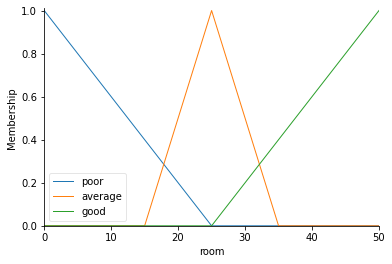

In [6]:
room.view()

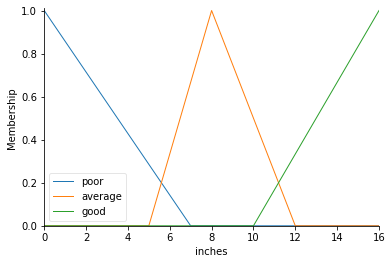

In [7]:
inches.view()

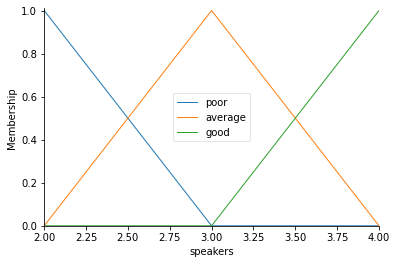

In [8]:
speakers.view()

### Потолок взял за 100, а не за 1000, чтобы график был более читаем

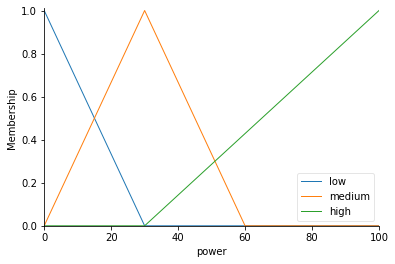

In [9]:
power.view()

##### Если размер помещения большой и диаметр колонок огромный, то мощность средняя.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b748b99d0>)

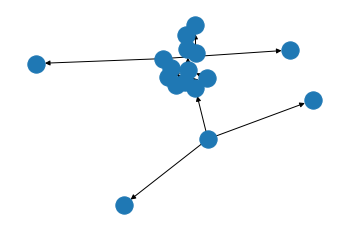

In [10]:
rule1 = ctrl.Rule(room['good'] & inches['good'] & (speakers['poor'] | speakers['average'] | speakers['good'])
                  , power['medium'])
rule1.view()

##### Если размер помещения большой и диаметр колонок малый или средний, то мощность огромная.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b74800450>)

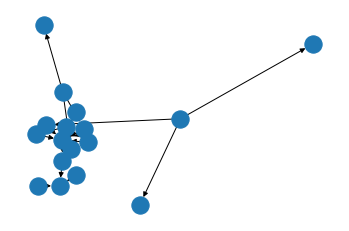

In [11]:
rule2 = ctrl.Rule(room['good'] & (inches['poor'] | inches['average']) & (speakers['poor'] | speakers['average'] | speakers['good'])
                  , power['high'])
rule2.view()

##### Если размер помещения = “средний” и диаметр колонок = “большой” или “средний”, то мощность = “средняя”.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b7493d410>)

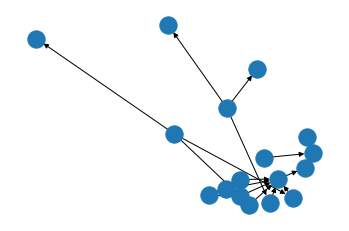

In [12]:
rule3 = ctrl.Rule(room['average'] & (inches['good'] | inches['average']) & (speakers['poor'] | speakers['average'] | speakers['good'])
                  , power['medium'])
rule3.view()

##### Если размер помещения = “средний” и диаметр колонок = “малый”, то мощность = “высокая”.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b749b1ed0>)

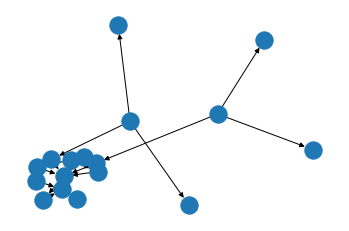

In [13]:
rule4 = ctrl.Rule(room['average'] & inches['poor'] & (speakers['poor'] | speakers['average'] | speakers['good'])
                  , power['high'])
rule4.view()

##### Если размер помещения = “малый” и диаметр колонок = "средний" или "большой", то мощность = “средняя”.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b74afe510>)

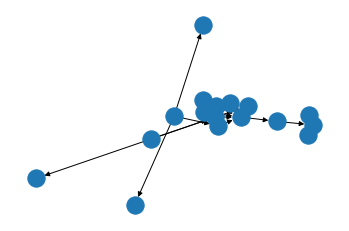

In [14]:
rule5 = ctrl.Rule(room['poor'] & (inches['average'] | inches['good']) & (speakers['poor'] | speakers['average'] | speakers['good'])
                  , power['medium'])
rule5.view()

##### Если размер помещения = “малый” и диаметр колонок = “небольшой”, то мощность = “небольшая”.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b749f65d0>)

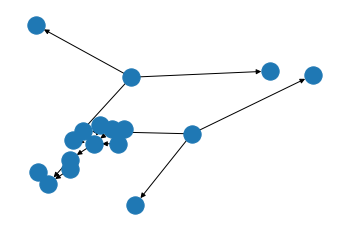

In [15]:
rule6 = ctrl.Rule(room['poor'] & inches['poor'] & (speakers['poor'] | speakers['average'] | speakers['good'])
                  , power['low'])
rule6.view()

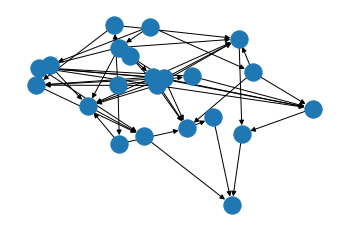

In [16]:
# Создаем базу из 3 правил
powers_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
# Визуализируем
powers_ctrl.view()

## А теперь пример

In [17]:
# Создаем модель расчёта
powers = ctrl.ControlSystemSimulation(powers_ctrl)
# Подаем на вход четкие числа
powers.input['room'] = 9
powers.input['inches'] = 4
powers.input['speakers'] = 3

In [18]:
# запускаем расчет
powers.compute()

In [19]:
# Печатаем результат
print (powers.output['power'])

12.07792207792208


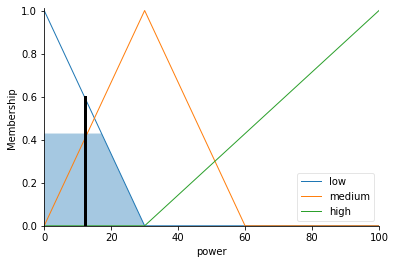

In [20]:
# выводим результат в виде графика
power.view(sim=powers)

## Плоскость

(51, 51) (51, 51) (51, 51)


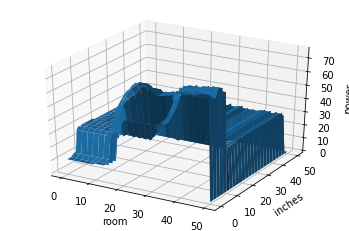

In [21]:
x = np.arange(0, 51, 1)
y = np.arange(0, 51, 1)
a = np.arange(2, 4, 1)
# meshgrid создаем прямоугольную сетку из массива значений x и массивзначений y.
x, y = np.meshgrid(x, y)
# a = np.meshgrid(a)

# zeros_like() возвращает новый массив из нулей с формой и типом данных указанного массива
z = np.zeros_like(x)

# вычисляем значения z в каждой точке
for i in range(50):
    k = i % 2
    for j in range(50):
        powers.input['room'] = x[i, j]
        powers.input['inches'] = y[i, j]
        powers.input['speakers'] = a[k]
        powers.compute()
        z[i, j] = powers.output['power']
        
# Create matplotlib Figure and Axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

print(x.shape, y.shape, z.shape)

# Plot the surface
ax.plot_surface(x, y, z)

ax.set_xlabel('room')
ax.set_ylabel('inches')
ax.set_zlabel('power')

plt.show()